/home/hellhat/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/hellhat/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hellhat/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hellhat/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetr

Ativação: logistic, Tamanho de Lote: 16, Máximo de Épocas: 1000, Taxa de Aprendizado: 0.001
Acurácia: 0.7200
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.85      0.53      0.65        66
           2       0.74      0.86      0.79       257
           3       0.62      0.58      0.60       118
           4       0.00      0.00      0.00         9

    accuracy                           0.72       450
   macro avg       0.55      0.49      0.51       450
weighted avg       0.71      0.72      0.71       450



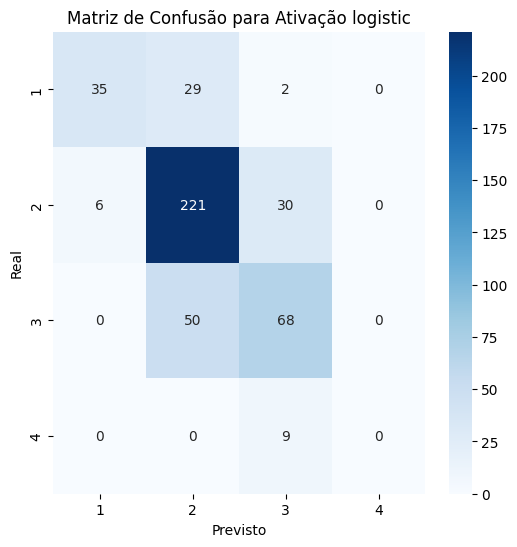

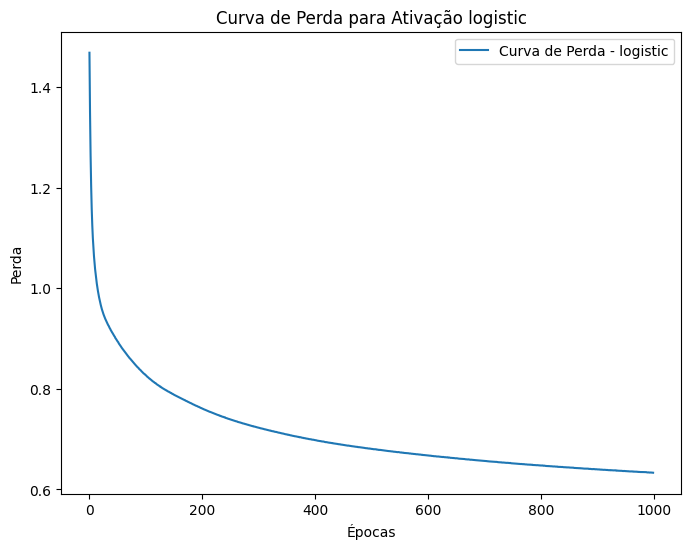

Ativação: logistic, Tamanho de Lote: 16, Máximo de Épocas: 1000, Taxa de Aprendizado: 0.01
Acurácia: 0.8733
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.88      0.76      0.81        66
           2       0.89      0.91      0.90       257
           3       0.83      0.90      0.86       118
           4       1.00      0.22      0.36         9

    accuracy                           0.87       450
   macro avg       0.90      0.70      0.74       450
weighted avg       0.88      0.87      0.87       450



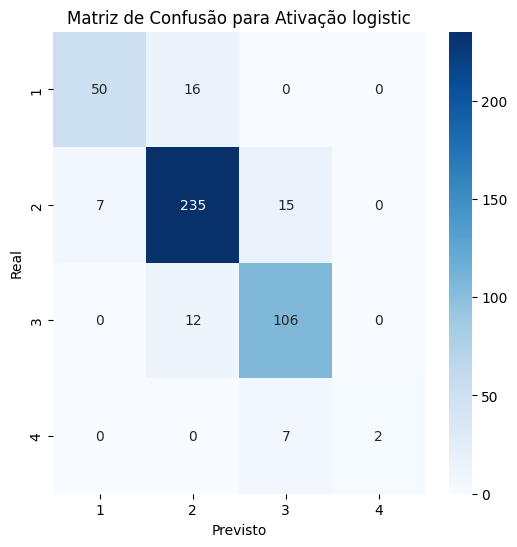

Exception ignored in: <function JavaWrapper.__del__ at 0x7f985bf61440>
Traceback (most recent call last):
  File "/home/hellhat/anaconda3/lib/python3.11/site-packages/pyspark/ml/wrapper.py", line 53, in __del__
    if SparkContext._active_spark_context and self._java_obj is not None:
                                              ^^^^^^^^^^^^^^
AttributeError: 'MultilayerPerceptronClassifier' object has no attribute '_java_obj'


ValueError: x and y must have same first dimension, but have shapes (1000,) and (341,)

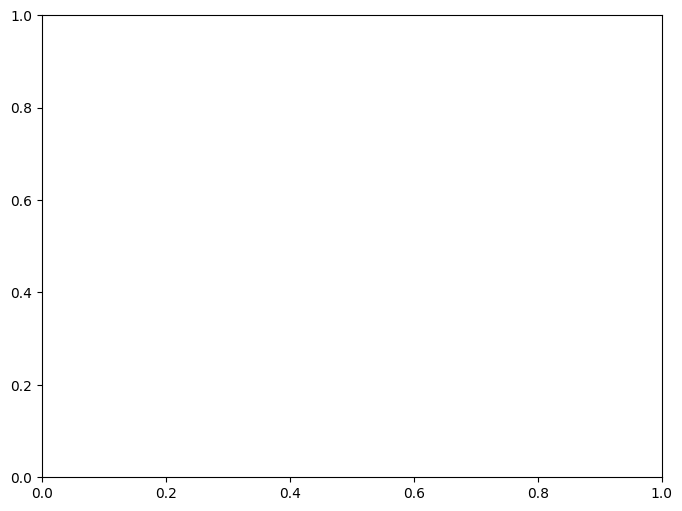

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Configurações para grid search
ACTIVATION_FUNCTIONS = ['logistic', 'tanh', 'relu', 'identity']
HIDDEN_LAYER_ARCHITECTURES = [
    (5,),           # Uma camada com 5 neurônios
    (10,),          # Uma camada com 10 neurônios
    (5, 3),         # Duas camadas: 5 e 3 neurônios
    (10, 5),        # Duas camadas: 10 e 5 neurônios
    (15, 10, 5),    # Três camadas: 15, 10 e 5 neurônios
    (20, 15, 10)    # Três camadas: 20, 15 e 10 neurônios
]
BATCH_SIZES = [10, 50, 100, 200]
EPOCHS = [1000, 2000, 3000, 4000, 5000]


# Preparação dos dados
df = pd.read_csv('./data/treino_sinais_vitais_com_label.csv')
X = df[['qPa', 'pulso', 'respiracao']]
y = df['rotulo']

# Dividir e escalar dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Função de análise abrangente
def comprehensive_mlp_analysis():
    results = []

    for activation in ACTIVATION_FUNCTIONS:
        for arch in HIDDEN_LAYER_ARCHITECTURES:
            for batch_size in BATCH_SIZES:
                for epoch in EPOCHS:
                    mlp = MLPClassifier(
                        hidden_layer_sizes=arch,
                        activation=activation,
                        batch_size=batch_size,
                        max_iter=epoch,
                        random_state=42,
                        learning_rate_init=0.01
                    )

                    mlp.fit(X_train_scaled, y_train)
                    y_pred = mlp.predict(X_test_scaled)

                    result = {
                        'Activation': activation,
                        'Architecture': str(arch),
                        'Batch Size': batch_size,
                        'Epochs': epoch,
                        'Accuracy': accuracy_score(y_test, y_pred),
                        'Precision': precision_score(y_test, y_pred, average='weighted'),
                        'Recall': recall_score(y_test, y_pred, average='weighted'),
                        'F1 Score': f1_score(y_test, y_pred, average='weighted')
                    }
                    results.append(result)

    return pd.DataFrame(results)

# Executar análise
results_df = comprehensive_mlp_analysis()

# Salvando resultados
results_df.to_csv('neural_network_comprehensive_results.csv', index=False)

# Visualizações
plt.figure(figsize=(20, 15))

# Accuracy por Função de Ativação
plt.subplot(2, 2, 1)
results_df.boxplot(column='Accuracy', by='Activation')
plt.title('Accuracy por Função de Ativação')
plt.suptitle('')

# Accuracy por Arquitetura
plt.subplot(2, 2, 2)
results_df.boxplot(column='Accuracy', by='Architecture')
plt.title('Accuracy por Arquitetura')
plt.suptitle('')

# Accuracy por Batch Size
plt.subplot(2, 2, 3)
results_df.boxplot(column='Accuracy', by='Batch Size')
plt.title('Accuracy por Tamanho de Batch')
plt.suptitle('')

# Accuracy por Épocas
plt.subplot(2, 2, 4)
results_df.boxplot(column='Accuracy', by='Epochs')
plt.title('Accuracy por Número de Épocas')
plt.suptitle('')

plt.tight_layout()
plt.savefig('neural_network_accuracy_analysis.png')
plt.close()

# Heatmap de correlação
plt.figure(figsize=(10, 8))
correlation_matrix = results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlação entre Métricas')
plt.tight_layout()
plt.savefig('metrics_correlation_heatmap.png')
plt.close()

# Sumário estatístico
print("Resumo Estatístico dos Resultados:")
print(results_df.describe())

# Top 10 melhores configurações
print("\nTop 10 Configurações por Accuracy:")
print(results_df.nlargest(10, 'Accuracy'))